In [1]:
#!pip install mlxtend

## Working of Decision tree 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [3]:
data = load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
d = { "sepal_width" : data.data[50:,1],
     "petal_length" : data.data[50:,2], "Species": np.array( [ i  for i in data.target if i > 0]) }

d['sepal_width'].shape

(100,)

In [7]:
df = pd.DataFrame(data= d)
df

,sepal_width,petal_length,Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [8]:
# now we will shuffel the data frame 
df = df.sample(df.shape[0])
df

,sepal_width,petal_length,Species
19,2.5,3.9,1
85,3.0,6.1,2
5,2.8,4.5,1
53,2.9,5.6,2
13,2.9,4.7,1
...,...,...,...
71,2.8,4.9,2
8,2.9,4.6,1
0,3.2,4.7,1
66,3.0,5.5,2


In [9]:
# we will now create a data for training and testing 

df_train = df.iloc[:60, :].sample(10)

df_test = df.iloc[61:,:].sample(5)

df_tt = df_train.sample(5, replace= True )

X_test = df_tt.iloc[:,:-1].values
y_test = df_tt.iloc[:,-1].values


# Sampling 

In [10]:
def evaluate(model , X_train, y_train):
    model.fit(X_train, y_train)
    plot_tree(model)
    
    plt.show()
    plot_decision_regions(X_train, y_train, model, legend=2)
    plt.show()
    y_pred = model.predict(X_test)
    
    print("test_values: ", X_test)
    
    print("y_test: ", y_test)
    print("y_pred: ", y_pred)
    
    print(accuracy_score(y_test, y_pred))
    
    return model

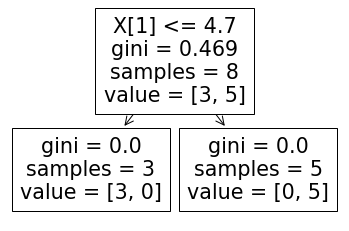

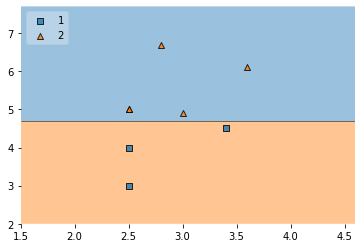

test_values:  [[3.4 4.5]
 [2.6 5.6]
 [2.5 3. ]
 [2.8 4.5]
 [2.8 4.5]]
y_test:  [1 2 1 1 1]
y_pred:  [1 2 1 1 1]
1.0


In [11]:
# now create a first tree 

df_t = df_train.sample(8, replace= True )

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1 = evaluate(dt, X_train, y_train)

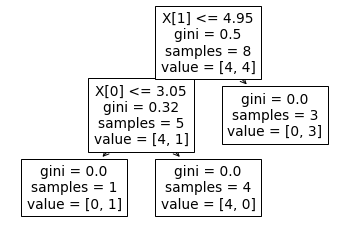

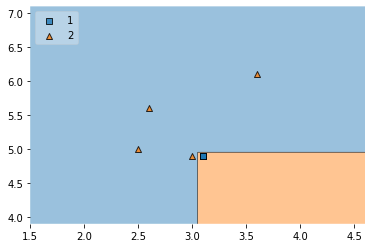

test_values:  [[3.4 4.5]
 [2.6 5.6]
 [2.5 3. ]
 [2.8 4.5]
 [2.8 4.5]]
y_test:  [1 2 1 1 1]
y_pred:  [1 2 2 2 2]
0.4


In [12]:
# now create a second tree 

df_t = df_train.sample(8, replace= True )

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag2 = evaluate(dt, X_train, y_train)

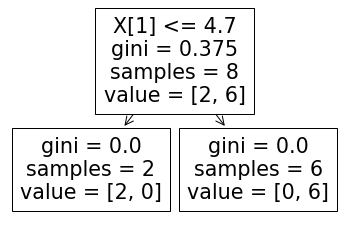

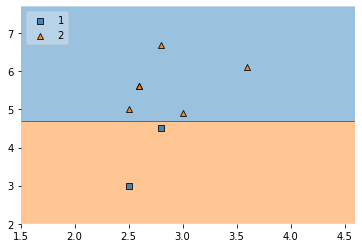

test_values:  [[3.4 4.5]
 [2.6 5.6]
 [2.5 3. ]
 [2.8 4.5]
 [2.8 4.5]]
y_test:  [1 2 1 1 1]
y_pred:  [1 2 1 1 1]
1.0


In [13]:
# now create a third tree 

df_t = df_train.sample(8, replace= True )

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values


dt = DecisionTreeClassifier()
bag3 = evaluate(dt, X_train, y_train)

# Aggrigation 

In [14]:
print("Prediction 1", bag1.predict( np.array([2.5,4.9]).reshape(1,2) ))
print("Prediction 2", bag2.predict( np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3", bag3.predict( np.array([2.5,4.9]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [2]
